In [2]:
import numpy as np
np.random.seed(42)

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
dataset = load_boston()

In [5]:
x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [9.1181022]
Intercept: -34.662307438406785
R2-Score: 0.4584649934303068


### Non-linear Transformation:

$\vec{x} =\left(\!
    \begin{array}{c}
      x_1 \\
      x_2
    \end{array}
  \!\right) $ Wir haben Datenpunkte mit z.B. 2 Features.  
  
$\vec{z} = \phi(\vec{x})$   Wir wollen dann eine Transformation mit dem Grad=2 ausführen.  

$\vec{z} =\left(\!
    \begin{array}{c}
      z_1 \\
      \vdots \\
      z_9
    \end{array}
  \!\right) $ Daraus resultierenden dann (in dem Beispiel) 6 Features.  

In [7]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3
pf = PolynomialFeatures(degree=degree)
pf.fit(x_train)

x_train_transformed = pf.transform(x_train)
x_test_transformed = pf.transform(x_test)

In [8]:
print(x_train.shape, x_train_transformed.shape)
print(x_test.shape, x_test_transformed.shape)

(354, 1) (354, 4)
(152, 1) (152, 4)


In [9]:
print(f"Old num features: {pf.n_input_features_}")
print(f"New num features: {pf.n_output_features_}")
print("Old feature names: [x0, x1]")
print(f"New feature names: {pf.get_feature_names()}")

Old num features: 1
New num features: 4
Old feature names: [x0, x1]
New feature names: ['1', 'x0', 'x0^2', 'x0^3']


#### Polynomial Regression:

$\vec{y} = \mathbf{Z}\vec{\beta} + \vec{\epsilon}$  
$\mathbf{Z}$ ist hier dann der Datensatz nach der Transformation.

In [10]:
poly_regr = LinearRegression()
poly_regr.fit(x_train_transformed, y_train)
r2_score = poly_regr.score(x_test_transformed, y_test)

print(f"Coef: {poly_regr.coef_}")
print(f"Intercept: {poly_regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [   0.         -115.82781708   17.62024917   -0.80641456]
Intercept: 253.69150365133908
R2-Score: 0.5837996977227156


#### Visualization

In [11]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)
    
    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))
    
    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

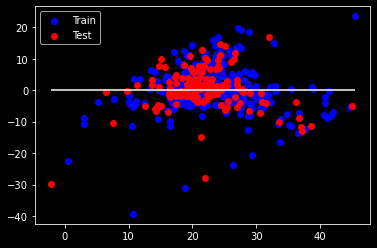

In [12]:
plot_residuals(regr, x_train, y_train, x_test, y_test)

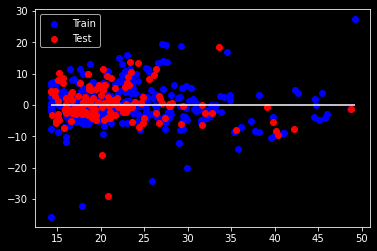

In [13]:
plot_residuals(poly_regr, x_train_transformed, y_train, x_test_transformed, y_test)

#### Plot PolyRegression

In [38]:
def f(x: np.ndarray) -> np.ndarray:
    return -x**4 * np.cos(x)

x = np.arange(start= 0.0, stop=10.0, step=0.2).reshape(-1, 1)
y = f(x)

colors: list[str] = ["blue", "red", "green", "orange"]

In [45]:
def plot_poly_reg(x: np.ndarray, y: np.ndarray, degree: int) -> None:
    # Preprocessing
    pf = PolynomialFeatures(degree=degree)
    pf.fit(x)

    x_transformed = pf.transform(x)

    poly_regr = LinearRegression()
    poly_regr.fit(x_transformed, y)
    r2_score = poly_regr.score(x_transformed, y)
    
    y_pred = poly_regr.predict(x_transformed)

    # Plotting
    _ = plt.figure(figsize=(8, 8))
    plt.plot(x, y, color="lightblue", linewidth=2, label="Ground Truth")
    plt.scatter(x, y, color="white", s=30, marker="o", label="Dataset")
    plt.plot(x, y_pred, color=colors[degree - 1], linewidth=2, label=f"Degree: {degree}")
    plt.show()

    # Print prediction metrics
    print(f"Coef: {poly_regr.coef_}")
    print(f"Intercept: {poly_regr.intercept_}")
    print(f"R2-Score: {r2_score}")
    print(f"Degree: {degree}\n")
    print(f"Feature names: {pf.get_feature_names()}")

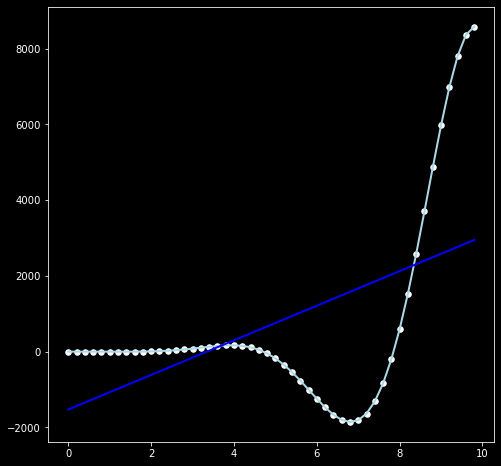

Coef: [[  0.       456.741386]]
Intercept: [-1527.09804037]
R2-Score: 0.25983607779456774
Degree: 1

Feature names: ['1', 'x0']


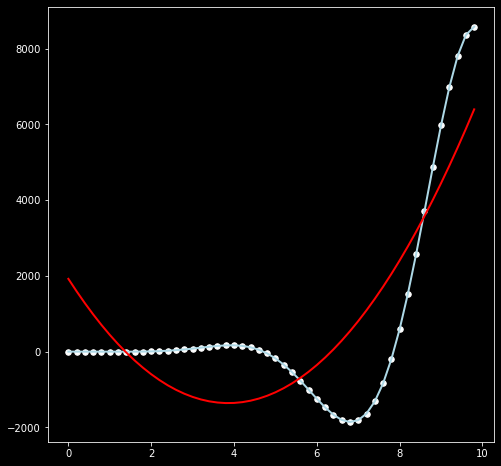

Coef: [[    0.         -1699.50036417   220.02466838]]
Intercept: [1922.8887599]
R2-Score: 0.6611782386230813
Degree: 2

Feature names: ['1', 'x0', 'x0^2']


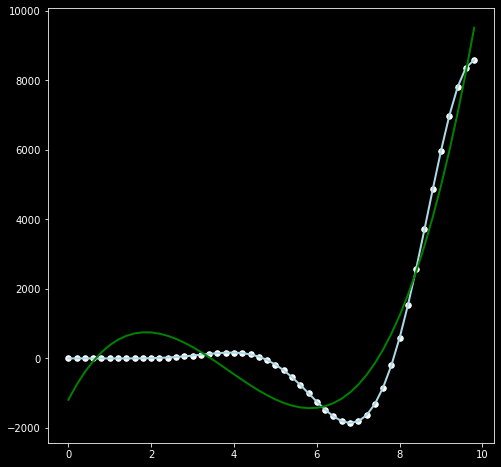

Coef: [[   0.         2316.53632244 -814.89117365   70.40243823]]
Intercept: [-1190.13809295]
R2-Score: 0.9243841430582472
Degree: 3

Feature names: ['1', 'x0', 'x0^2', 'x0^3']


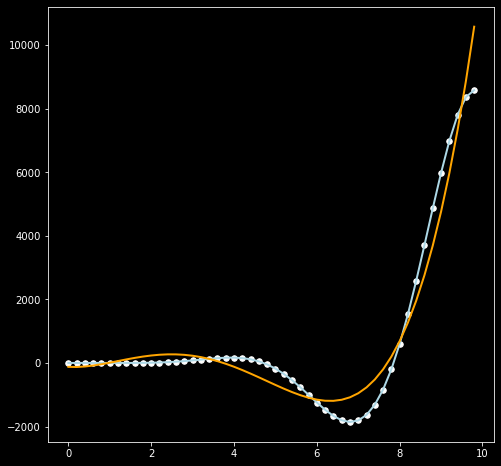

Coef: [[   0.          -79.05542047  311.19641383 -109.52398022    9.17991931]]
Intercept: [-123.16414998]
R2-Score: 0.9526153196936835
Degree: 4

Feature names: ['1', 'x0', 'x0^2', 'x0^3', 'x0^4']


In [46]:
for degree in [1, 2, 3, 4]:
    plot_poly_reg(x, y, degree)